**Problem Statement**

XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Data Description**

* **Id** - an Id that represents a (Store, Date) duple within the set
* **Store** - a unique Id for each store
* **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **State Holiday** - indicates a state holiday. Normally all stores, with few
exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **School Holiday** - indicates if the (Store) was affected by the closure of public schools
* **Store Type** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **Competition Distance** – the distance in meters to the nearest competitor store
* **Competition Open Since[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2  Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* **Promo Interval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, and November of any given year for that store.



**Approach**

* **Understanding the problem**
* **Data Collection and Exploration** : Load and explore the dataset - Understand the features and target variable - Handling missing values and outliers - Data Cleaning
* **Perform EDA** : Summary Statistics - Visualise target variable - Feature relationships - Feature Engineering - Hypothesis testing
* **Data Preprocessing** : Encoding categorical variables - Normalizing/Scaling the data
* **Data Splitting and Model Selection**
* **Model training and evaluation** : Training the models on the training data set - Evaluate models using metrics such as RMSE, MAE or MAPE - Perform hyperparameter tuning to improve model performance
* **Ensemble models** : Use stacking, boosting or bagging to improve performance
* **Model validation** : Validate the final model on a validation set - Check for overfitting and underfitting






In [ ]:
!nvidia-smi

Sat Jun 15 05:51:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#Importing required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

###Data Collection and Exploration

#####Data Collection

In [ ]:
sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/XYZ/Salesdata.csv")
store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/XYZ/store.csv")

#####Data Exploration

In [ ]:
# First look of the stores dataset
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Information about the stores dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


*Inference - There are 1017208 rows and 9 columns in this data. There are integers and object data types. No null values in any of the columns in Sales dataset.*

In [ ]:
# Information about the sales dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


*Inference - There are 1115 rows, which means store data is available for 1115 stores. There are integer and object data types. Null values are present, so next step is to handle null values.*

###Data Preprocessing

#####Handling missing values

In [ ]:
# Check for null values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Confirming that Promo2SinceWeek has null values only when the Promo2 value is 0.
# It means if there are no promotions marketed for that store (Promo2=0), then obviously the other related columns will be null
print(store_df[(store_df['Promo2']==0) & (store_df['Promo2SinceWeek'])]['Promo2SinceWeek'].count())
print(store_df[(store_df['Promo2']==1) & (store_df['Promo2SinceWeek'])]['Promo2SinceWeek'].count())

0
571


In [ ]:
# Confirming that Promo2SinceYear has null values only when the Promo2 value is 0
# It means if there are no promotions marketed for that store (Promo2=0), then obviously the other related columns will be null
print(store_df[(store_df['Promo2']==0) & (store_df['Promo2SinceYear'])]['Promo2SinceYear'].count())
print(store_df[(store_df['Promo2']==1) & (store_df['Promo2SinceYear'])]['Promo2SinceYear'].count())

0
571


In [ ]:
# Confirming that PromoInterval has null values only when the Promo2 value is 0
# It means if there are no promotions marketed for that store (Promo2=0), then obviously the other related columns will be null
print(store_df[(store_df['Promo2']==0) & (store_df['PromoInterval'])]['PromoInterval'].count())
print(store_df[(store_df['Promo2']==1) & (store_df['PromoInterval'])]['PromoInterval'].count())

0
571


*Inference -*
*Columns having null values in Stores dataset*

* *CompetitionDistance - It contains distance between the stores, so it is a continuous data, can be imputed with mean or median value*
* *CompetitionOpenSinceMonth - It is the month of the time the nearest competitor was opened, so it is a nominal variable, can be imputed with mode*
* *CompetitionOpenSinceYear - It is the year of the time the nearest competitor was opened, so it is a nominal variable, can be imputed with mode*
* *Promo2SinceWeek, Promo2SinceYear, PromoInterval - These have null values only when Promo2 is 0, i.e., when there are no promotions*



In [ ]:
# Description of the Competition Distance data
store_df['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

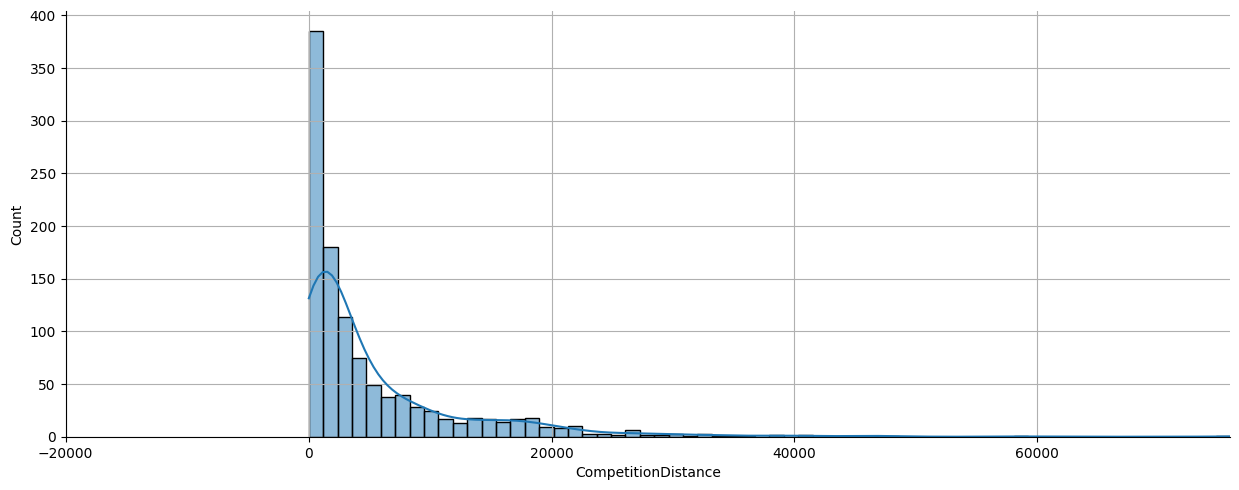

In [ ]:
# Distribution plot of competition distance
sns.displot(data=store_df, x='CompetitionDistance',kde=True,height=5, aspect=2.5)
plt.xlim(-20000, store_df['CompetitionDistance'].max())
plt.grid(True)
plt.show()

*Inference - Data contains outliers and skewed to the right, imputing with the mean may be influenced by these outliers, leading to biased estimates. In such cases, median imputation is more robust.*

In [ ]:
# Filling the null values in Competition Distance column with median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

In [ ]:
# Filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# Imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
# Check for null values after imputation
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# Merge Stores and Sales data sets
df = sales_df.merge(right=store_df,on='Store',how='left')

In [ ]:
# First look of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
# Shape of the merged dataset
df.shape

(1017209, 18)

In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


*Inference - The sales column has min value 0. Let's check this.*

In [ ]:
df[(df['Sales']==0) & (df['Open']==0)].count()

Store                        172817
DayOfWeek                    172817
Date                         172817
Sales                        172817
Customers                    172817
Open                         172817
Promo                        172817
StateHoliday                 172817
SchoolHoliday                172817
StoreType                    172817
Assortment                   172817
CompetitionDistance          172817
CompetitionOpenSinceMonth    172817
CompetitionOpenSinceYear     172817
Promo2                       172817
Promo2SinceWeek              172817
Promo2SinceYear              172817
PromoInterval                172817
dtype: int64

*Inference - Sales is 0 when the store is closed. This data is irrelevant when predicting sales. So, removing this data in the next cell. After which, Open column becomes irrelevant too. So removing that as well.*

In [ ]:
df = df[df['Sales']!=0]
df = df.drop('Open',axis=1)

#df = df[df.Open != 0]
#df = df.drop('Open', axis=1)

#####Feature Engineering

In [ ]:
# Creating features from the date column
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear

#####Encode Categorical Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  float64       
 11  CompetitionOpenSinceMonth  844338 non-null  float64     

In [ ]:
# Find Unique values in Categorical columns - StateHoliday, StoreType, Assortment, PromoInterval
print(df['StateHoliday'].unique())
print(df['StoreType'].unique())
print(df['Assortment'].unique())
print(df['PromoInterval'].unique())

['0' 'a' 'b' 'c' 0]
['c' 'a' 'd' 'b']
['a' 'c' 'b']
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


*Inference - StateHoliday is supposed to have 4 unique values, but it has 5. Before encoding, this has to be fixed*

In [ ]:
df['StateHoliday'].value_counts()

StateHoliday
0    731308
0    112120
a       694
b       145
c        71
Name: count, dtype: int64

*Inference - The presence of two different '0' values in 'StateHoliday' column suggests there might be both string and integer representations for the same value. Let's address this by converting all 'StateHoliday' values to string and then encoding the categorical variables.*

In [ ]:
# Converting StateHoliday column to String type
df['StateHoliday'] = df['StateHoliday'].astype(str)
print(df['StateHoliday'].unique())

['0' 'a' 'b' 'c']


In [ ]:
print(df['StateHoliday'].nunique()+df['StoreType'].nunique()+df['Assortment'].nunique()+df['PromoInterval'].nunique())

15


*Inference - The total categorical column values is 15, enconding this would create 11 new columns. Let's do it only of these features has significant impact on the target value which can be concluded during EDA.*

###Exploratory Data Analysis

####Visualisation

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


######EDA of Stores data

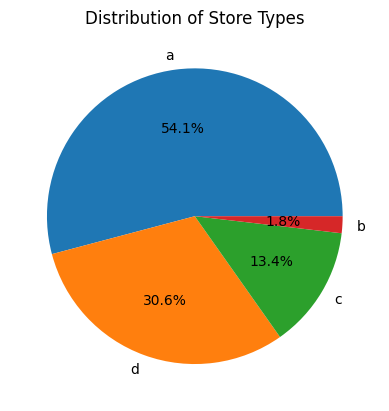

In [ ]:
# Distribution of Store types
storetype_counts = df['StoreType'].value_counts()

plt.pie(storetype_counts, labels=storetype_counts.index, autopct='%.1f%%')
plt.title('Distribution of Store Types')
plt.show()

*Inference - Storetype 'a' is of higher numbers, 'd' is next and then follows 'c' and 'b'*

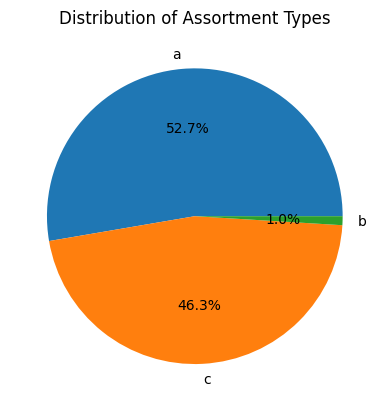

In [ ]:
# Distribution of Store types
assortment_counts = df['Assortment'].value_counts()

plt.pie(assortment_counts, labels=assortment_counts.index, autopct='%.1f%%')
plt.title('Distribution of Assortment Types')
plt.show()

*Inference - Assortment type 'a' is of higher numbers, 'c' is next and then follows 'b'*

######EDA of Merged dataset

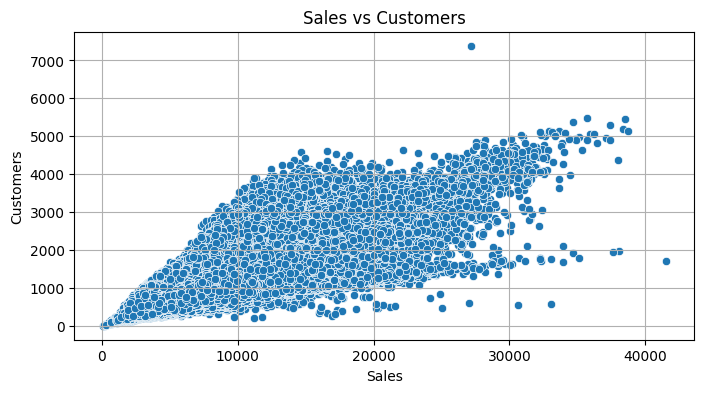

In [ ]:
# Sales vs Customers
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='Sales',y='Customers')
plt.title('Sales vs Customers')
plt.grid(True)
plt.show()

*Inference - The Customers and Sales independent variables has positive correlation*

In [ ]:
# # Storewise Sales **********************************************
# # find min total sales store, max total sales store year wise
# print("Store with minimum Sales for each year",df.loc[[df.groupby(['Year', 'Store'])['Sales'].sum()].groupby('Year')['Sales'].idxmin()])
# # find min average sales store, max avergae sales store year wise
# print("Store with maximum Sales for each year",df.loc[[df.groupby(['Year', 'Store'])['Sales'].sum()].groupby('Year')['Sales'].idxmin()])

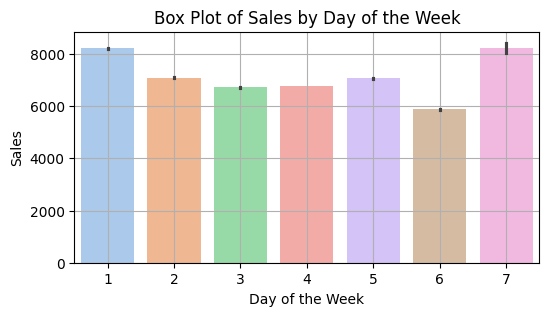

In [ ]:
# Sales vs Weekdays
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='DayOfWeek', y='Sales', palette='pastel')
plt.title('Box Plot of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

*Inference - Day Of Week = 7 being Sunday, it has the maximum Sales followed by Monday. Except Saturday, all of the other days has similar Sales value*

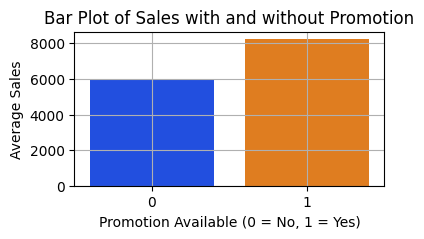

In [ ]:
# Sales vs Promo
plt.figure(figsize=(4, 2))
sns.barplot(data=df, x='Promo', y='Sales',palette='bright')
plt.title('Bar Plot of Sales with and without Promotion')
plt.xlabel('Promotion Available (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

*Inference - Promotion definitely has a positive effect on Sales. Stores involved in promotion activities are preforming better in Sales than stores without promotion*

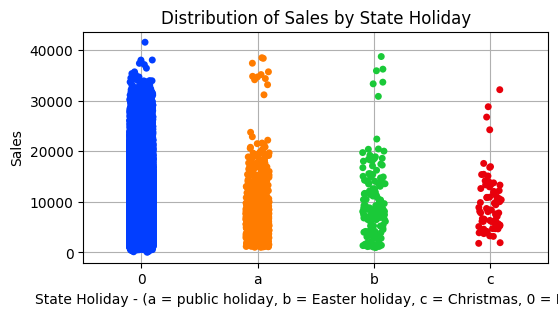

In [ ]:
# Sales vs StateHoliday
plt.figure(figsize=(6, 3))
sns.stripplot(data=df, x='StateHoliday', y='Sales',palette='bright')
plt.title('Distribution of Sales by State Holiday')
plt.xlabel('State Holiday - (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

*Inference - Normal days performance is better than holidays. That too if it is a long holiday (c = Christmas), Sales is very low. The longer the holidays, the lower the Sales*

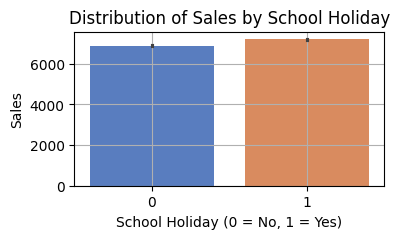

In [ ]:
# Sales vs SchoolHoliday
plt.figure(figsize=(4, 2))
sns.barplot(data=df, x='SchoolHoliday', y='Sales', palette='muted')
plt.title('Distribution of Sales by School Holiday')
plt.xlabel('School Holiday (0 = No, 1 = Yes)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

*Inference - School holidays does not affect Sales much. Sales is almost similar with or without School holidays*

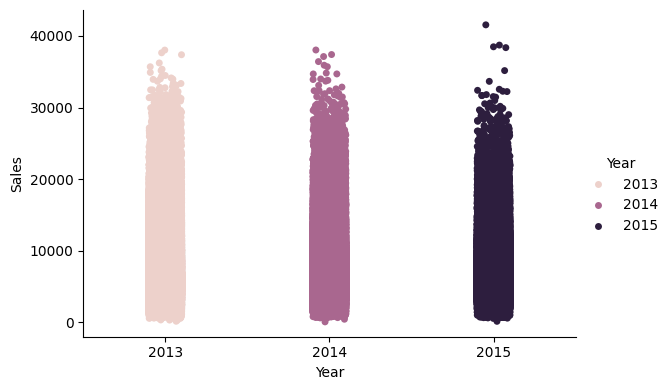

In [ ]:
# Sales vs Year
sns.catplot(data=df,x='Year',y='Sales',hue='Year',height=4,aspect=1.5)
plt.show()

*Inference - Sales performance is almost same throughout all the years given. This indicates that if there were any new stores added the following year or existing stores removed that does not have any effect on Sales*

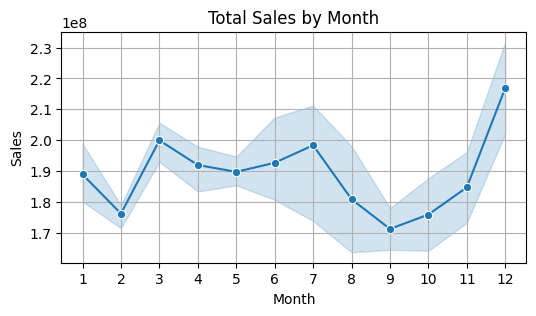

In [ ]:
# Sales vs Month
monthly_sales = df.groupby(['Month','Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(6, 3))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(range(1, 13))  # Assuming Month ranges from 1 to 12
plt.show()

*Inference - Sales was highest in the month of December and lowest in the month of February. Previously it was infered that longer the holidays lesser the Sales. But here December month(Christmas long holiday month) is showing highest Sales indcates that, people buy from these stores just before the vacation starts, may be to stock up for holidays.*

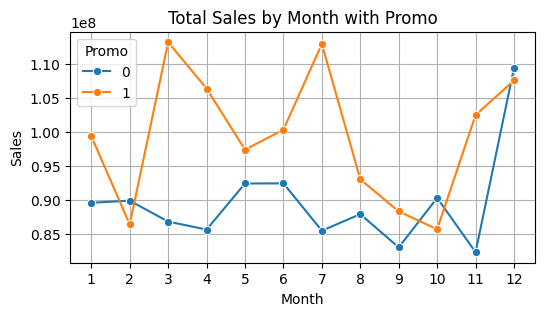

In [ ]:
# Sales vs Month categorized with Promo
monthly_sales_promo = df.groupby(['Month','Year','Promo'])['Sales'].sum().reset_index()

plt.figure(figsize=(6, 3))
sns.lineplot(data=monthly_sales_promo, x='Month', y='Sales', marker='o',hue='Promo', ci=None)
plt.title('Total Sales by Month with Promo')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(range(1, 13))  # Assuming Month ranges from 1 to 12
plt.show()

*Inference - Promotions are definitely affecting the Sales positively.*

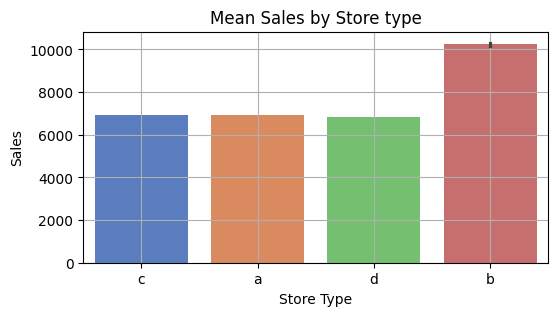

In [ ]:
# Sales vs Store type
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='StoreType', y='Sales',palette='muted',hue='StoreType')
plt.title('Mean Sales by Store type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

*Inference - Store type b performs very well whereas the other Store types shows almost same performance*

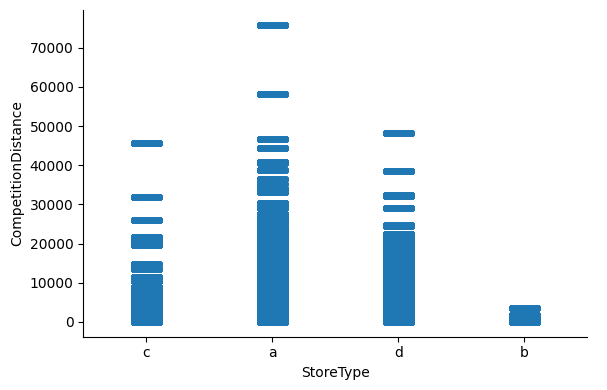

In [ ]:
# Store type vs Competition distance
sns.catplot(x='StoreType', y='CompetitionDistance',data=df, height=4, aspect=1.5)
plt.show()

*Inference - Store type b has lesser number of Competitors and its Sales is high(previous chart). Store type a has a lot number of Competitors than c and d and it still performs similar to c and d*

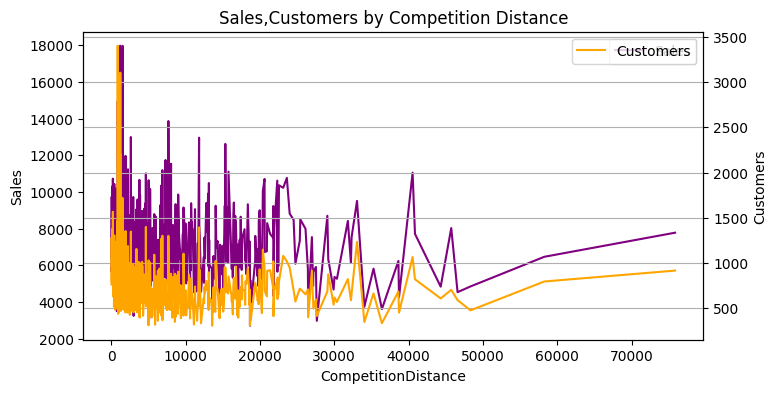

In [ ]:
# CompetitionDistance vs Sales vs Customers
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='CompetitionDistance', y='Sales',color='purple',ci=None,label='Sales')
plt.twinx()
sns.lineplot(data=df, x='CompetitionDistance', y='Customers',color='orange',ci=None,label='Customers')
plt.title('Sales,Customers by Competition Distance')
plt.grid(True)
plt.show()

*Inference - The presence and proximity of competitors significantly impact sales and customer numbers, with more intense competition (closer distances) leading to greater variability in both metrics. It highlights the importance of considering competition distance in strategic planning to optimize store performance and ensure sustainable growth*

In [ ]:
# Combining competition open since month and year into total months
df['CompetitionOpen'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['Month'] - df['CompetitionOpenSinceMonth'])
# Correcting the neg values
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
# Binning the 'CompetitionOpen' feature
df['CompetitionOpen_Bin'] = pd.cut(df['CompetitionOpen'], bins=10, labels=False)

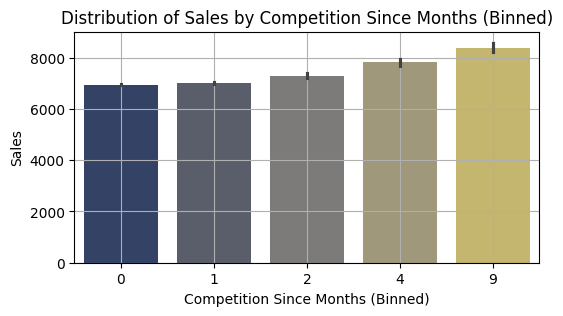

In [ ]:
# Sales vs CompetitionSinceYear
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='CompetitionOpen_Bin', y='Sales', palette='cividis')
plt.title('Distribution of Sales by Competition Since Months (Binned)')
plt.xlabel('Competition Since Months (Binned)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

*Inference - Sales show a slight increase as the competition ages, with a notable peak at around 9 months since competition entry*

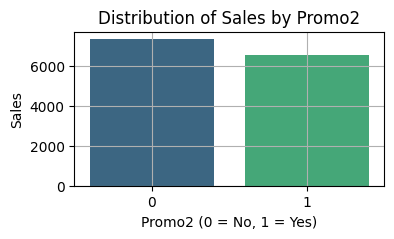

In [ ]:
# Sales vs Promo2
plt.figure(figsize=(4,2))
sns.barplot(data=df, x='Promo2', y='Sales', palette='viridis')
plt.title('Distribution of Sales by Promo2')
plt.xlabel('Promo2 (0 = No, 1 = Yes)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

*Inference - Promo2 promotion activities does not help Sales much, Sales is better without Promo2 running*

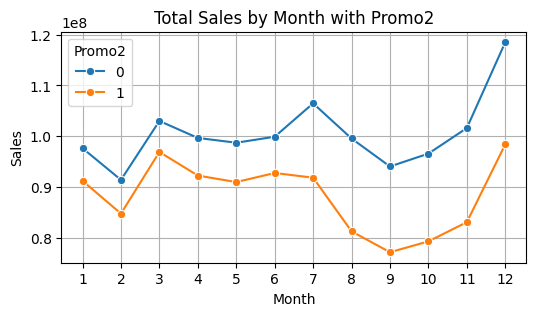

In [ ]:
# Sales vs Month categorized with Promo2
monthly_sales_promo2 = df.groupby(['Month','Year','Promo2'])['Sales'].sum().reset_index()

plt.figure(figsize=(6, 3))
sns.lineplot(data=monthly_sales_promo2, x='Month', y='Sales', marker='o',hue='Promo2', ci=None)
plt.title('Total Sales by Month with Promo2')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(range(1, 13))  # Assuming Month ranges from 1 to 12
plt.show()

*Inference - Another proof that Promo2 does not improve Sales*

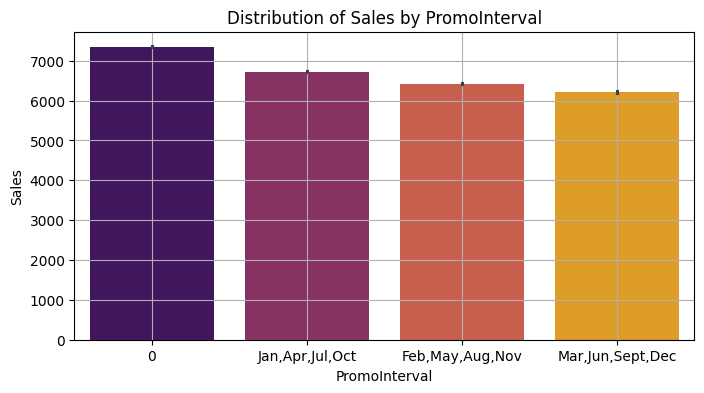

In [ ]:
# Sales Vs PromoInterval
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='PromoInterval', y='Sales', palette='inferno')
plt.title('Distribution of Sales by PromoInterval')
plt.xlabel('PromoInterval')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

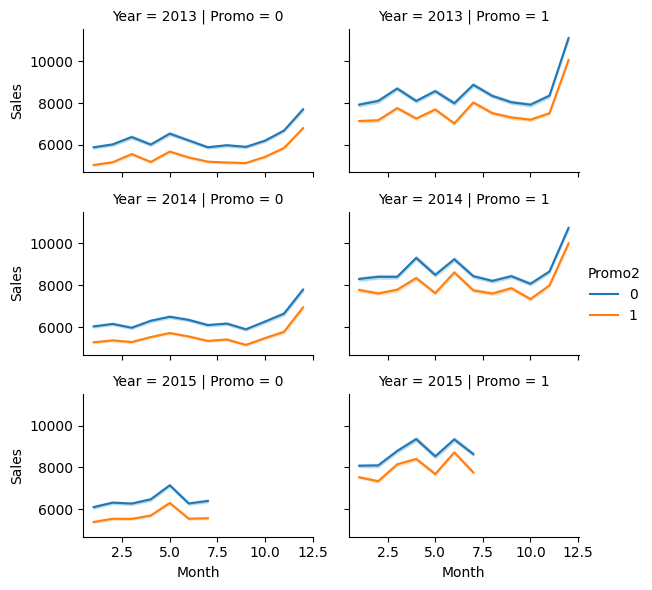

In [ ]:
g = sns.FacetGrid(df, row='Year', col='Promo', hue='Promo2', height=2, aspect=1.5)
g.map_dataframe(sns.lineplot, x='Month', y='Sales')
g.add_legend()
plt.show()

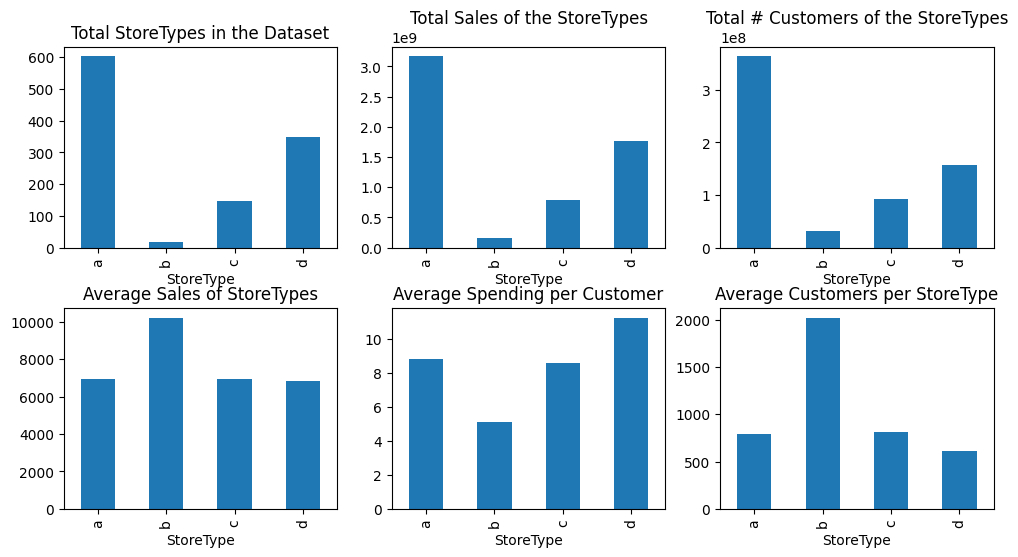

In [ ]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers
f, ax = plt.subplots(2, 3, figsize = (12,6))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total # Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

*Inference - StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.*

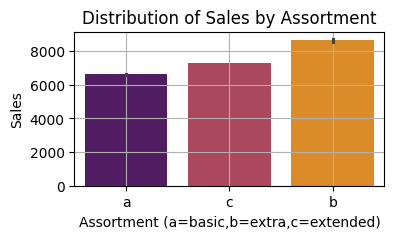

In [ ]:
# Sales vs Assortment
plt.figure(figsize=(4,2))
sns.barplot(data=df, x='Assortment', y='Sales', palette='inferno')
plt.title('Distribution of Sales by Assortment')
plt.xlabel('Assortment (a=basic,b=extra,c=extended)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

*Inference - Assortment b performs well followed by c and then by a.*
* *Previous charts shows that there are high number of assortment a (52.7%), but it still shows lesser performance, may be because it is a basic store*
* *Although assortment b stores has only 1% of stores, it performs well*

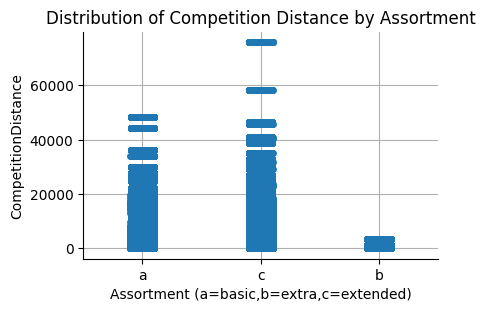

In [ ]:
sns.catplot(x='Assortment', y='CompetitionDistance',data=df, height=3, aspect=1.5)
plt.title('Distribution of Competition Distance by Assortment')
plt.xlabel('Assortment (a=basic,b=extra,c=extended)')
plt.ylabel('CompetitionDistance')
plt.grid(True)
plt.show()

*Inference - Competition distance varies widely for stores with basic (a) and extended (c) assortments, while stores with extra (b) assortments have competitors closer by. But assortment b performs well as per previous chart. For basic and extended assortments, business should consider leveraging unique offerings to attract customers despite distant competitors*

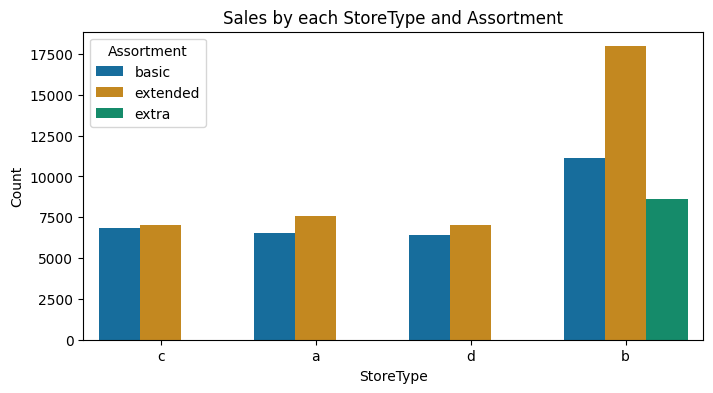

In [ ]:
# Sales by each Storetype and Assortment
assortment_mapping = {'a': 'basic', 'b': 'extra', 'c': 'extended'}
plt.figure(figsize=(8, 4))
#ax = sns.countplot(data=df, x='StoreType', hue='Assortment')
ax=sns.barplot(data=df, x='StoreType', y='Sales', hue='Assortment', palette='colorblind', ci=None)
plt.title('Sales by each StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Count')

# Modify the legend to show custom labels
handles, labels = ax.get_legend_handles_labels()
new_labels = [assortment_mapping[label] for label in labels]
ax.legend(handles, new_labels, title='Assortment')

plt.show()

*Inference -*

* *StoreType 'b' with the extended assortment has the highest sales count*
* *Extended assortments consistently outperform basic and extra assortments across all store types*
* *Basic assortments generally have the lowest sales count across all store types*



######Correlation Matrix

In [ ]:
df_new=df.copy()
# Encoding  - DayOfWeek, StateHoliday, StoreType, Assortment, PromoInterval
df_new = pd.get_dummies(df_new,columns=['DayOfWeek','StoreType','Assortment','StateHoliday','PromoInterval'], drop_first=True)
# Exclude 'Date' column
df_corr = df_new[df_new.columns[df_new.columns!='Date']]

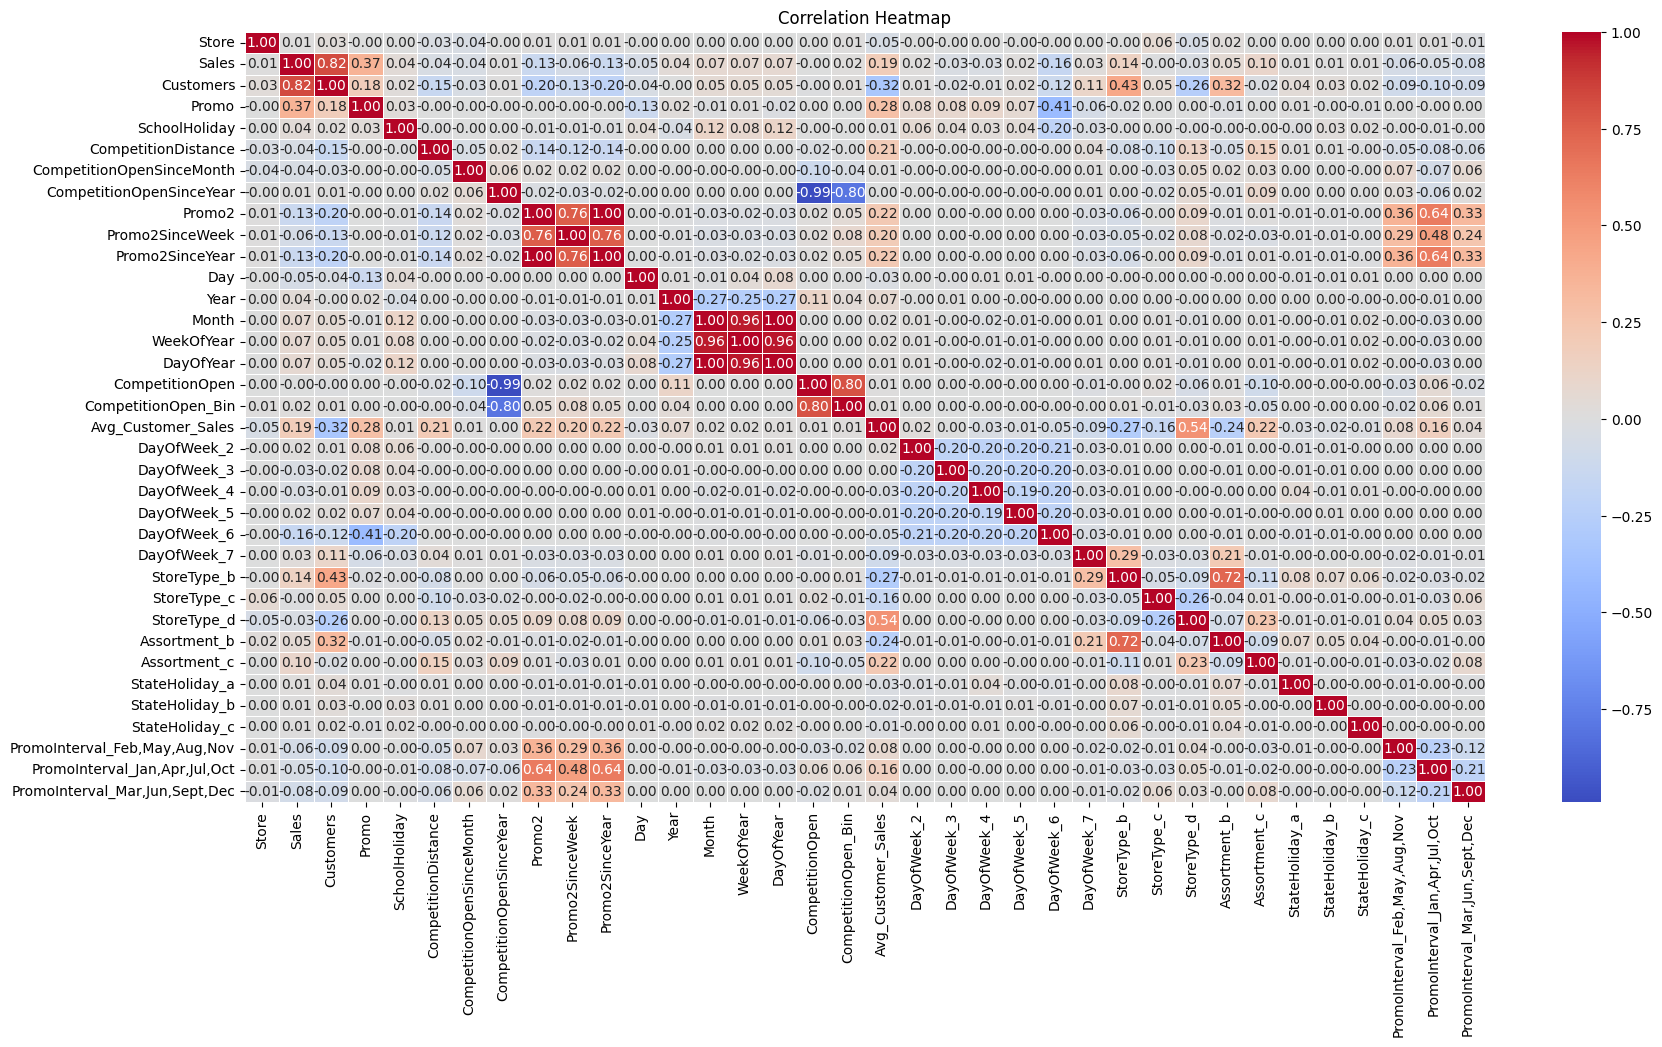

In [ ]:
# Correlation map of Sales
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

###Hypothesis

*  Customer Count Influence - The number of customers visiting a store is
positively correlated with sales.
*  Competition Distance Effect - Stores located farther from their competitors experience higher sales due to reduced competition.
*  Impact of Store Type - Different store types (e.g., StoreType_a, StoreType_b) significantly affect sales, with certain types performing better than others.
*  Promotional Activities - Promotional activities (e.g., Promo) lead to increased sales.
*  Seasonality and Monthly Trends - Sales vary significantly across different months, indicating a seasonal trend.
*  Day of the Week Variability - Sales figures fluctuate depending on the day of the week, with weekends potentially showing higher sales.
*  Assortment Impact - The type of assortment (e.g., Assortment_a, Assortment_b) offered by the store impacts sales performance.

###Model Selection

######Select meanningful features based on Correlation and VIF

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# df_new contains non-numeric columns, select only numeric columns
df_numeric = df_new.select_dtypes(include=['float', 'int'])
df_numeric.dropna(inplace=True)
# Add a constant column for the intercept term
df_numeric['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = df_numeric.columns

# Compute VIF for each variable
vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i)
                   for i in range(df_numeric.shape[1])]

# Drop the Intercept column from VIF results
vif_data = vif_data[vif_data['feature'] != 'Intercept']

# Sort VIF data by VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                      feature            VIF
8                      Promo2  791880.436667
10            Promo2SinceYear  791335.151824
14                  DayOfYear   19375.705806
13                      Month   19254.367591
15            CompetitionOpen     373.566034
7    CompetitionOpenSinceYear     352.377646
11                        Day     142.788959
2                   Customers      11.858767
1                       Sales      11.369566
12                       Year       6.924795
17         Avg_Customer_Sales       4.164447
16        CompetitionOpen_Bin       3.036077
9             Promo2SinceWeek       2.554155
6   CompetitionOpenSinceMonth       1.847031
3                       Promo       1.251508
5         CompetitionDistance       1.113552
4               SchoolHoliday       1.025842
0                       Store       1.005869


*The selected columns are DayOfWeek, Customers, Promo, SchoolHoliday, CompetitionDistance, Promo2, Month, Day, CompetitionOpen, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c, StateHoliday_a, StateHoliday_b, StateHoliday_c*

######Outliers Detection and Transformation of Data

In [ ]:
def find_outliers_IQR(df):  ### function to find outliers using IQR method
    LL,UL = find_LL_UL(df)
    outliers = df[((df < LL) | (df > UL))]
    result = [LL,UL,outliers]
    return result

def find_LL_UL(df):         ### function to find lower limit and upper limit values in the given data using IQR method
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    LL = q1 - 1.5 * IQR
    UL = q3 + 1.5 * IQR
    return (LL,UL)

In [ ]:
df_new['Sales'].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

*Inference - The range of Sales data is wider, min=46,max=41551. This indicates presence of higher percentage of outliers. Transformations can help mitigate the effect of outliers. Using a log transformation can reduce the impact of extreme values, making the model less sensitive to outliers.*

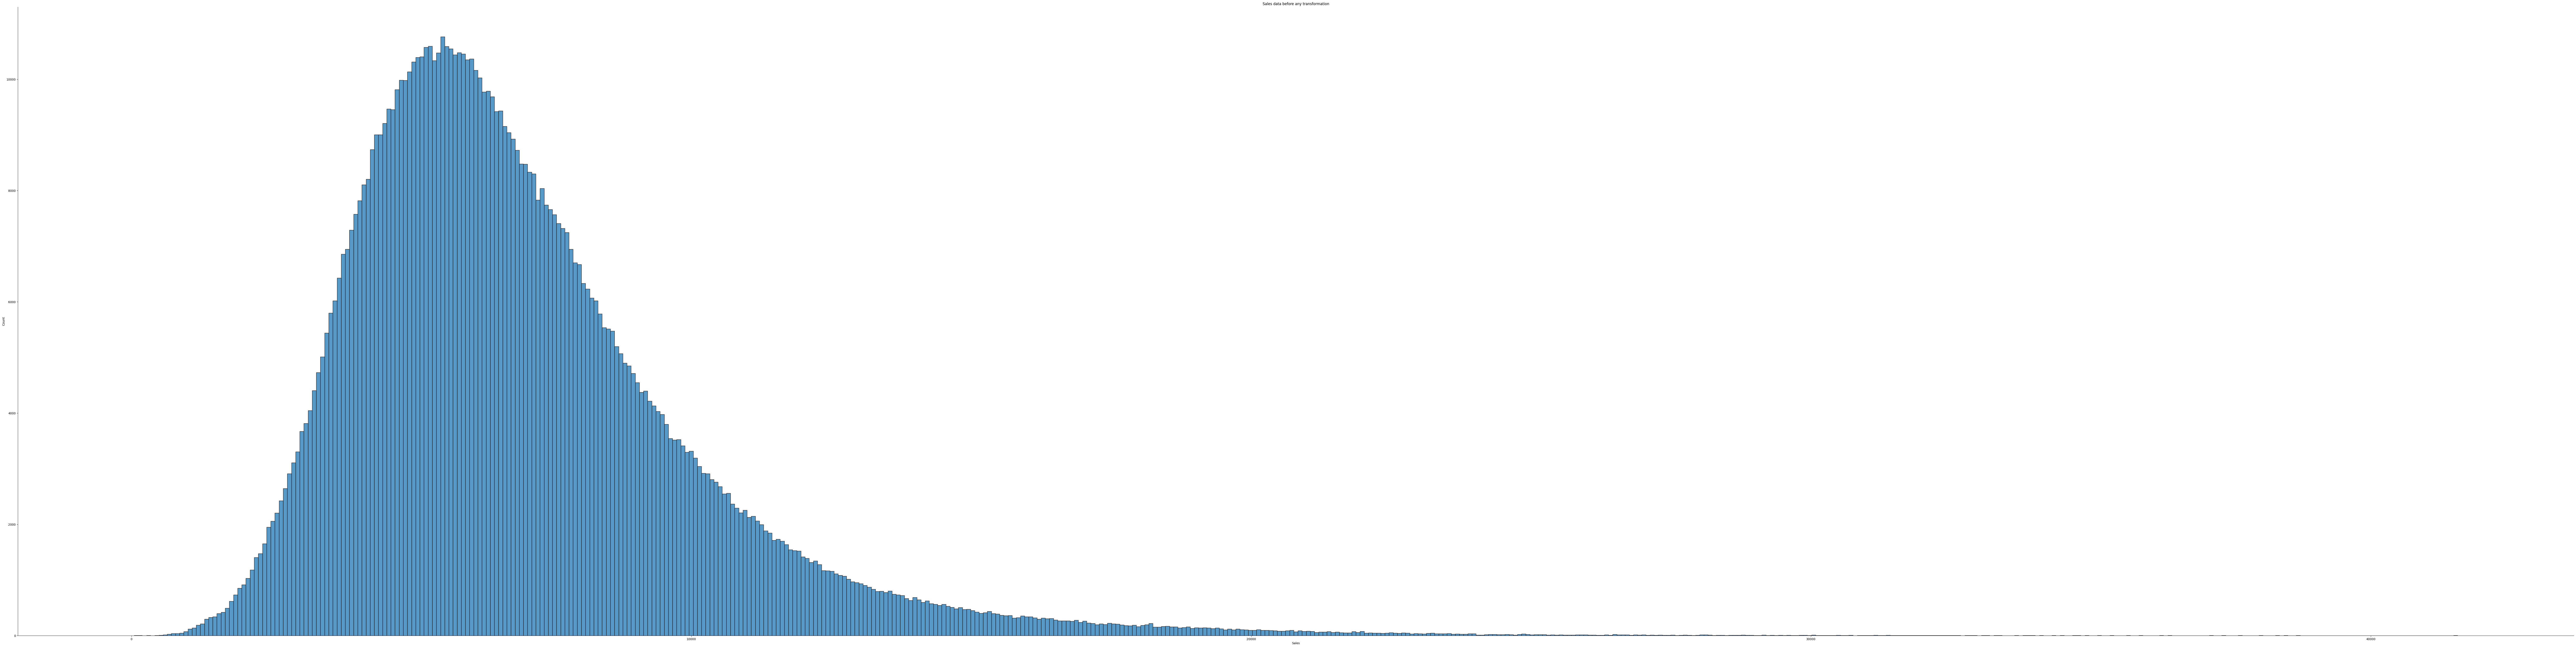

In [ ]:
# Distribution of Sales data before any transformation
sns.displot(x=df_new['Sales'],height=30, aspect=4)
plt.title('Sales data before any transformation')
plt.show()

*Inference - Distribution of Sales data is right skewed. Let's apply log transformation and check.*

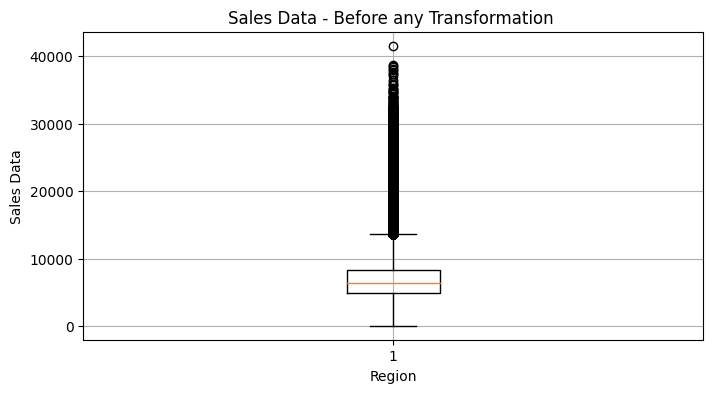

In [ ]:
# Boxplot of Sales data to identify outliers
plt.figure(figsize=(8, 4))
plt.boxplot(df_new['Sales'])
plt.title('Sales Data - Before any Transformation ')
plt.xlabel('Region')
plt.ylabel('Sales Data')
plt.grid(True)
plt.show()

In [ ]:
# Find the percentage of outliers in Sales column before any transformation
result = find_outliers_IQR(df_new['Sales'])
LL = result[0]
UL = result[1]
outliers = result[2]
print("Number of Outliers in Sales Data before any transformation: ",outliers.shape[0])
print("Percentage of outliers in Sales Data before any transformation: ", (outliers.shape[0]/df_new.shape[0])*100)

Number of Outliers in Sales Data before any transformation:  30769
Percentage of outliers in Sales Data before any transformation:  3.6441567239659944


In [ ]:
# Log transformation of Sales data
df_new['Sales'] = np.log(df_new['Sales'])

In [ ]:
df_new['Sales'].describe()

count    844338.000000
mean          8.757564
std           0.425278
min           3.828641
25%           8.488588
50%           8.759198
75%           9.031214
max          10.634677
Name: Sales, dtype: float64

In [ ]:
#df_new.dropna(inplace=True)
#df_new.drop(df_new[df_new['Sales'] == float("-inf")].index,inplace=True)

In [ ]:
#df_new['Sales'].describe()

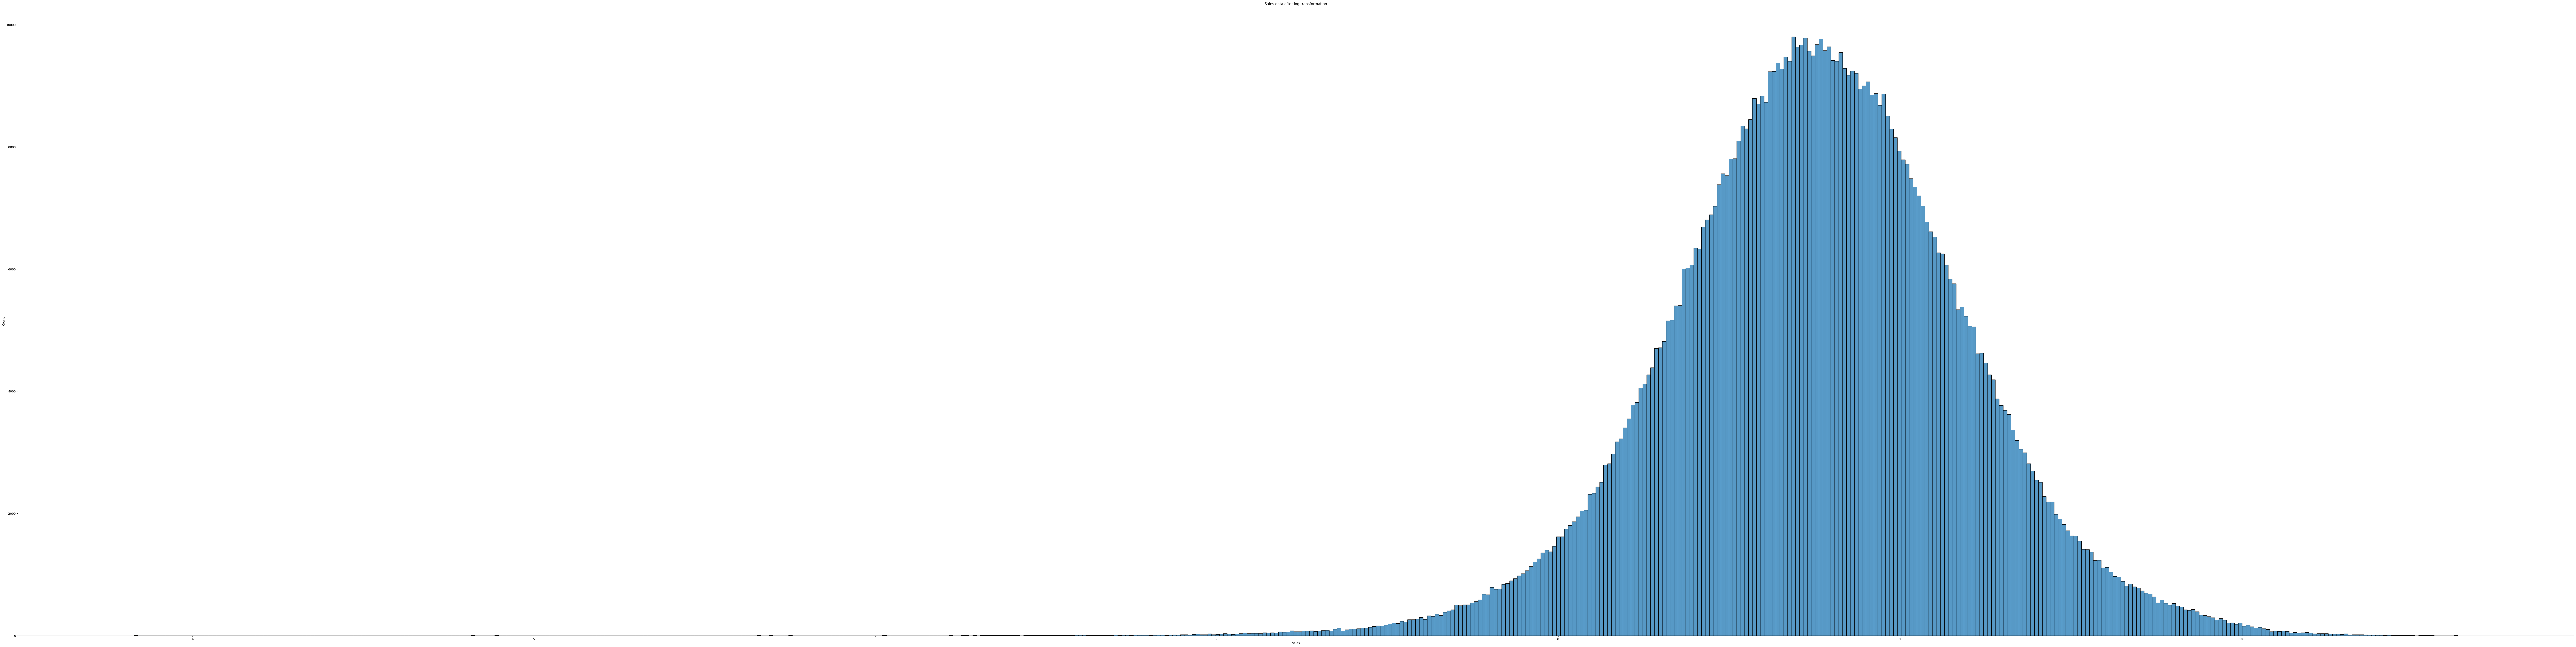

In [ ]:
# Distribution of Sales data after log transformation
sns.displot(x=df_new['Sales'],height=30, aspect=4)
plt.title('Sales data after log transformation')
plt.show()

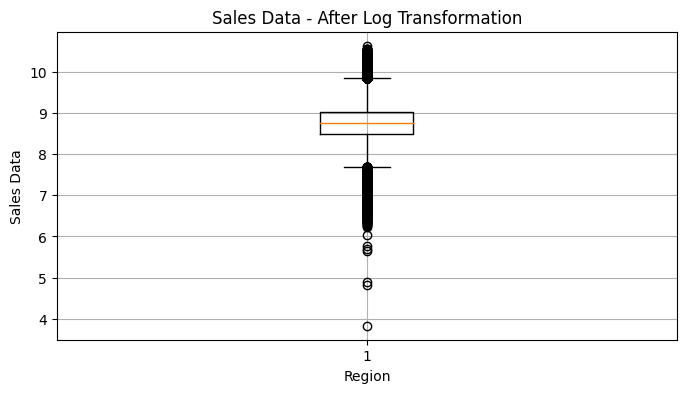

In [ ]:
# Boxplot of Sales data to identify outliers
plt.figure(figsize=(8, 4))
plt.boxplot(df_new['Sales'])
plt.title('Sales Data - After Log Transformation')
plt.xlabel('Region')
plt.ylabel('Sales Data')
plt.grid(True)
plt.show()

In [ ]:
# Find the percentage of outliers in Sales column after log transformation
result = find_outliers_IQR(df_new['Sales'])
LL = result[0]
UL = result[1]
outliers = result[2]
print("Number of Outliers in Sales Data after log transformation: ",outliers.shape[0])
print("Percentage of outliers in Sales Data after log transformation : ", (outliers.shape[0]/df_new.shape[0])*100)

Number of Outliers in Sales Data after log transformation:  13866
Percentage of outliers in Sales Data after log transformation :  1.642233323621583


######Handling Outliers

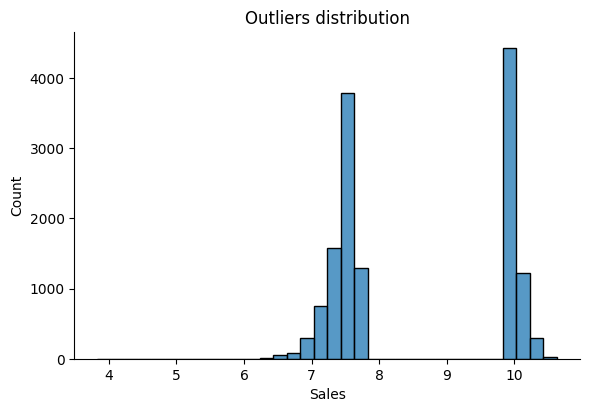

In [ ]:
outlier_df=df_new[((df_new['Sales']<LL) | (df_new['Sales']>UL))]
sns.displot(x=outlier_df['Sales'],height=4, aspect=1.5)
plt.title('Outliers distribution')
plt.show()

In [ ]:
(outlier_df['Store'].value_counts()>1).value_counts()

count
True     401
False    173
Name: count, dtype: int64

*Inference - Outlier data has a count of 574 stores, out of which 401 has significant number of total sales records. Since outliers are only a percentage of 1.64, I decide to keep it. Also, to reduce the impact of outliers let's use models that are inherently robust to outliers*

Train - Test Split

In [ ]:
cols_to_include = ['Day','Month','Customers','Promo','Promo2','CompetitionDistance','CompetitionOpen','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7',
                   'StoreType_b','StoreType_c','StoreType_d','Assortment_b','Assortment_c','SchoolHoliday','StateHoliday_a','StateHoliday_b','StateHoliday_c']

In [ ]:
from datetime import timedelta
df_new['Date']=pd.to_datetime(df_new['Date'], format='%m/%d/%Y')
firstDay=min(df_new['Date'])
lastDay=max(df_new['Date'])
trainData_start_date = firstDay
trainData_end_date = lastDay - timedelta(weeks=6) - timedelta(days=1)
testData_start_date = lastDay - timedelta(weeks=6)
testData_end_date = lastDay

print(f'Data chosen for training is from:{trainData_start_date} to {trainData_end_date}')
print(f'Data chosen for testing is from:{testData_start_date} to {testData_end_date}')

Data chosen for training is from:2013-01-01 00:00:00 to 2015-06-18 00:00:00
Data chosen for testing is from:2015-06-19 00:00:00 to 2015-07-31 00:00:00


In [ ]:
train = df_new[(df_new['Date']>=trainData_start_date) & (df_new['Date']<=trainData_end_date)]
test = df_new[(df_new['Date']>=testData_start_date) & (df_new['Date']<=testData_end_date)]

In [ ]:
# train = train[train.columns[train.columns!='Date']]
# test = test[test.columns[test.columns!='Date']]

train.set_index(['Date','Store'], inplace=True)
train.reset_index(level=['Date','Store'])

test.set_index(['Date','Store'], inplace=True)
test.reset_index(level=['Date','Store'])

train.head()
test.head()

Sales  Customers  Promo  SchoolHoliday  \
Date       Store                                              
2015-07-31 1      8.568456        555      1              1   
           2      8.710125        625      1              1   
           3      9.025696        821      1              1   
           4      9.546455       1498      1              1   
           5      8.480944        559      1              1   

                  CompetitionDistance  CompetitionOpenSinceMonth  \
Date       Store                                                   
2015-07-31 1                   1270.0                        9.0   
           2                    570.0                       11.0   
           3                  14130.0                       12.0   
           4                    620.0                        9.0   
           5                  29910.0                        4.0   

                  CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Date       Store                                                      
2015-07-31 1                        2008.0       0              0.0   
           2                        2007.0       1             13.0   
           3                        2006.0       1             14.0   
           4                        2009.0       0              0.0   
           5                        2015.0       0              0.0   

                  Promo2SinceYear  ...  StoreType_c  StoreType_d  \
Date       Store                   ...                             
2015-07-31 1                  0.0  ...         True        False   
           2               2010.0  ...        False        False   
           3               2011.0  ...        False        False   
           4                  0.0  ...         True        False   
           5                  0.0  ...        False        False   

                  Assortment_b  Assortment_c  StateHoliday_a  StateHoliday_b  \
Date       Store                                                               
2015-07-31 1             False         False           False           False   
           2             False         False           False           False   
           3             False         False           False           False   
           4             False          True           False           False   
           5             False         False           False           False   

                  StateHoliday_c  PromoInterval_Feb,May,Aug,Nov  \
Date       Store                                                  
2015-07-31 1               False                          False   
           2               False                          False   
           3               False                          False   
           4               False                          False   
           5               False                          False   

                  PromoInterval_Jan,Apr,Jul,Oct  \
Date       Store                                  
2015-07-31 1                              False   
           2                               True   
           3                               True   
           4                              False   
           5                              False   

                  PromoInterval_Mar,Jun,Sept,Dec  
Date       Store                                  
2015-07-31 1                               False  
           2                               False  
           3                               False  
           4                               False  
           5                               False  

[5 rows x 35 columns]

In [ ]:
x_train = train[cols_to_include]
y_train = train[['Sales']]
x_test = test[cols_to_include]
y_test = test[['Sales']]

print('X train shape:',x_train.shape)
print('Y train shape:',y_train.shape)

print('X test shape:',x_test.shape)
print('Y test shape:',y_test.shape)

x_train.head()

X train shape: (802942, 22)
Y train shape: (802942, 1)
X test shape: (41396, 22)
Y test shape: (41396, 1)


Day  Month  Customers  Promo  Promo2  CompetitionDistance  \
Date       Store                                                              
2015-06-18 1       18      6        498      1       0               1270.0   
           2       18      6        594      1       1                570.0   
           3       18      6        743      1       1              14130.0   
           4       18      6       1138      1       0                620.0   
           5       18      6        545      1       0              29910.0   

                  CompetitionOpen  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  ...  \
Date       Store                                                          ...   
2015-06-18 1                 81.0        False        False         True  ...   
           2                 91.0        False        False         True  ...   
           3                102.0        False        False         True  ...   
           4                 69.0        False        False         True  ...   
           5                  2.0        False        False         True  ...   

                  DayOfWeek_7  StoreType_b  StoreType_c  StoreType_d  \
Date       Store                                                       
2015-06-18 1            False        False         True        False   
           2            False        False        False        False   
           3            False        False        False        False   
           4            False        False         True        False   
           5            False        False        False        False   

                  Assortment_b  Assortment_c  SchoolHoliday  StateHoliday_a  \
Date       Store                                                              
2015-06-18 1             False         False              0           False   
           2             False         False              0           False   
           3             False         False              0           False   
           4             False          True              0           False   
           5             False         False              0           False   

                  StateHoliday_b  StateHoliday_c  
Date       Store                                  
2015-06-18 1               False           False  
           2               False           False  
           3               False           False  
           4               False           False  
           5               False           False  

[5 rows x 22 columns]

###Model Training

######Scaling

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train[list(x_train.columns)] = stdsc.fit_transform(x_train[list(x_train.columns)])
x_test[list(x_test.columns)] = stdsc.transform(x_test[list(x_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

######Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#fitting Linear model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

######Model Evaluation

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,
                      'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [ ]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,x_train,y_train,x_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results
      and creates a dataframe that compares the various models.'''

  #making predictions
  y_pred_train = model_variable.predict(x_train)
  y_pred_test = model_variable.predict(x_test)

  # Plot the test results
  a = y_test.copy()
  a.reset_index(drop=False,inplace=True)

  b = pd.DataFrame(y_pred_test.flatten())
  a['Pred Sales'] = b

  a.set_index(['Date','Store'],inplace=True)
  df_plot = a.reset_index(level=['Date','Store'])

  plot = df_plot.groupby('Date')[['Sales','Pred Sales']].sum()

  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)
  #Mean Absolute Percentage Error
  #MAPE_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
  #MAPE_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')
  #print(f'The Mean Absolute Percentage Error for the validation set is {MAPE_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

The Mean Absolute Error for the validation set is 0.38053
The Mean Squared Error for the validation set is 0.248872
The Root Mean Squared Error for the validation set is 0.49887
The R^2 for the validation set is 0.73697
The Adjusted R^2 for the validation set is 0.736831


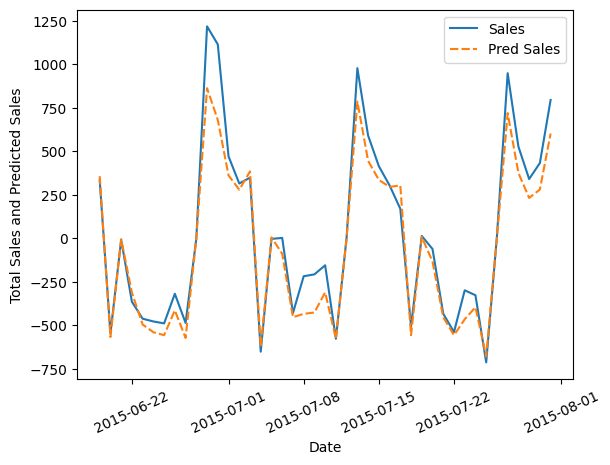

In [ ]:
#Linear Regression
lr_results = model_evaluation('Linear Regression',lr,x_train,y_train,x_test,y_test)

Observation:

*   Linear model performance metrics are not satisfactory, may be because most of the independent variables are categorical.


In [ ]:
#add results to comparison df
add_list_to_final_df(lr_results)

In [ ]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.377278,0.252773,0.502766,0.747227,0.74722,0.38053,0.248872,0.49887,0.73697,0.736831


######Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#fitting decision tree
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

The Mean Absolute Error for the validation set is 0.195823
The Mean Squared Error for the validation set is 0.072491
The Root Mean Squared Error for the validation set is 0.269241
The R^2 for the validation set is 0.923385
The Adjusted R^2 for the validation set is 0.923345


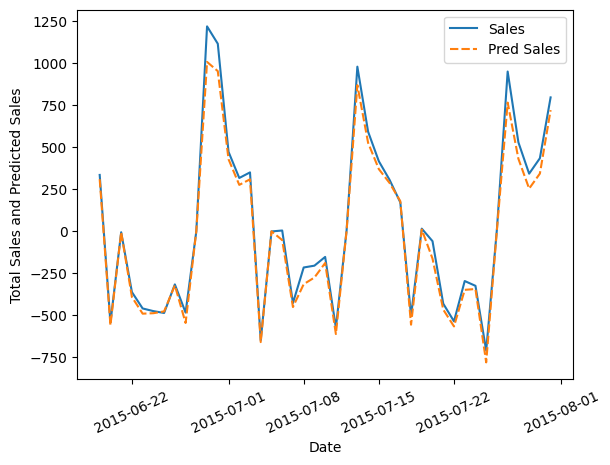

In [ ]:
#decision tree evaluation
decision_tree_results = model_evaluation('Decision Tree Regressor',dtr,x_train,y_train,x_test,y_test)

Observation:

*   Decision Tree Regressor has performed better than Linear Regression, but let's try Random Forest and see if it can beat Decision Tree Regressor



In [ ]:
#add results to comparison df
add_list_to_final_df(decision_tree_results)

In [ ]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.377278,0.252773,0.502766,0.747227,0.747220,0.380530,0.248872,0.498870,0.736970,0.736831
1,Decision Tree Regressor,0.000009,0.000002,0.001567,0.999998,0.999998,0.195823,0.072491,0.269241,0.923385,0.923345


######Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# fitting
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

The Mean Absolute Error for the validation set is 0.143259
The Mean Squared Error for the validation set is 0.035862
The Root Mean Squared Error for the validation set is 0.189372
The R^2 for the validation set is 0.962098
The Adjusted R^2 for the validation set is 0.962078


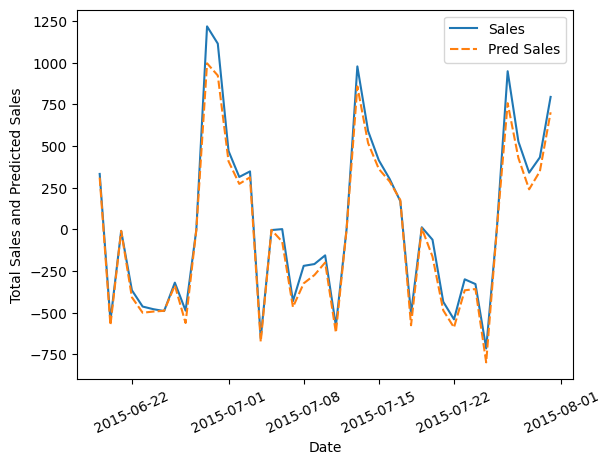

In [ ]:
#model evaluation
rf_results = model_evaluation('Random Forest Regressor',rf,x_train,y_train,x_test,y_test)

Observation:

*   Random Forest Regressor is has performed very well interms of R2 and Adjusted R2. The error metrics has also decreased.

In [ ]:
# updating comparison df
add_list_to_final_df(rf_results)

In [ ]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.377278,0.252773,0.502766,0.747227,0.747220,0.380530,0.248872,0.498870,0.736970,0.736831
1,Decision Tree Regressor,0.000009,0.000002,0.001567,0.999998,0.999998,0.195823,0.072491,0.269241,0.923385,0.923345
2,Random Forest Regressor,0.043542,0.003539,0.059489,0.996461,0.996461,0.143259,0.035862,0.189372,0.962098,0.962078


In [ ]:
#parameters used in random forest
print('Parameters currently in use:')
print(rf.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100,random_state=42)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

The Mean Absolute Error for the validation set is 0.195888
The Mean Squared Error for the validation set is 0.063357
The Root Mean Squared Error for the validation set is 0.251708
The R^2 for the validation set is 0.933039
The Adjusted R^2 for the validation set is 0.933003


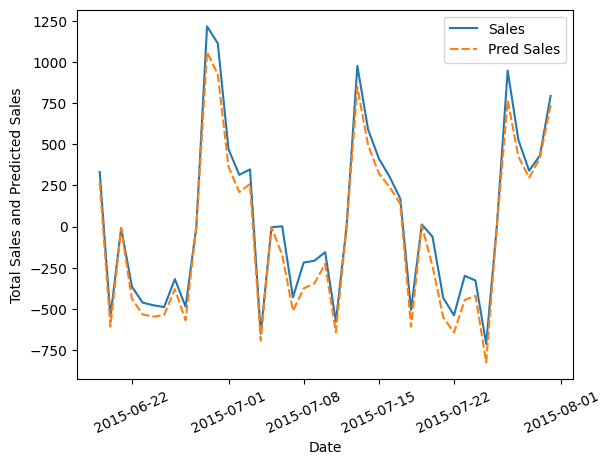

In [ ]:
#model evaluation
xg_boost_results = model_evaluation('XGBoost Regressor',xgb,x_train,y_train,x_test,y_test)

Observation:

* XG Boost model has not shown improvement over Random Forest
* Let's do hyper parameter tuninng of Random Forest model.

In [ ]:
# updating comparison df
add_list_to_final_df(xg_boost_results)

In [ ]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.377278,0.252773,0.502766,0.747227,0.747220,0.380530,0.248872,0.498870,0.736970,0.736831
1,Decision Tree Regressor,0.000009,0.000002,0.001567,0.999998,0.999998,0.195823,0.072491,0.269241,0.923385,0.923345
2,Random Forest Regressor,0.043542,0.003539,0.059489,0.996461,0.996461,0.143259,0.035862,0.189372,0.962098,0.962078
3,XGBoost Regressor,0.160881,0.043748,0.209159,0.956252,0.956251,0.195888,0.063357,0.251708,0.933039,0.933003


In [ ]:
#parameters used in xgboost
print('Parameters currently in use:')
print(xgb.get_params())

Parameters currently in use:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


######Random Forest Regressor Tuning

In [ ]:
#from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats


rft = RandomForestRegressor()

param_distributions = {
    'n_estimators': [100,120,150],
    'max_depth': [None, 40,60,80,100],
    'min_samples_split': stats.randint(2, 20),
    'min_samples_leaf': stats.randint(1, 8),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the Stacking Regressor
random_search = RandomizedSearchCV(estimator = rft, param_distributions = param_distributions, n_iter = 10, cv = 3, verbose=2, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time= 3.4min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time= 3.5min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time= 3.5min
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time= 1.3min
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time= 1.4min
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time= 1.4min
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=120

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 40, 60, 80, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7922e98c0f70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7922d7f6a740>,
                                        'n_estimators': [100, 120, 150]},
                   random_state=42, verbose=2)

In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_params

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 12,
 'n_estimators': 100}

The Mean Absolute Error for the validation set is 0.155507
The Mean Squared Error for the validation set is 0.041961
The Root Mean Squared Error for the validation set is 0.204844
The R^2 for the validation set is 0.955652
The Adjusted R^2 for the validation set is 0.955628


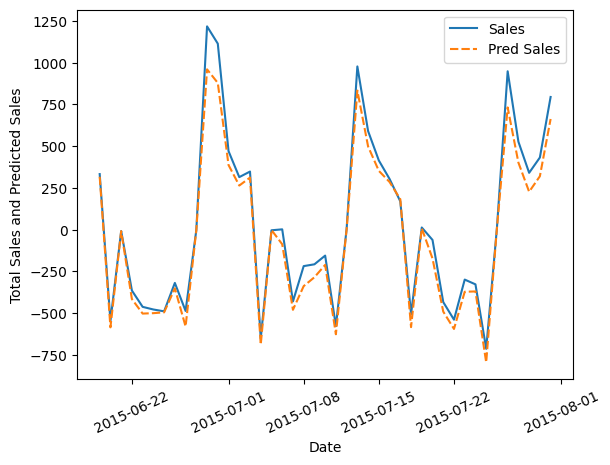

In [ ]:
#model evaluation
rft_results = model_evaluation('Tuned Random Forest Regressor',best_model,x_train,y_train,x_test,y_test)

Observation:

* Tuning hyper parameters has not helped much in terms of R2. But the overfitting of the training data is reduced.

In [ ]:
# updating comparison df
add_list_to_final_df(rft_results)

In [ ]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.377278,0.252773,0.502766,0.747227,0.747220,0.380530,0.248872,0.498870,0.736970,0.736831
1,Decision Tree Regressor,0.000009,0.000002,0.001567,0.999998,0.999998,0.195823,0.072491,0.269241,0.923385,0.923345
2,Random Forest Regressor,0.043542,0.003539,0.059489,0.996461,0.996461,0.143259,0.035862,0.189372,0.962098,0.962078
3,XGBoost Regressor,0.160881,0.043748,0.209159,0.956252,0.956251,0.195888,0.063357,0.251708,0.933039,0.933003
4,Tuned Random Forest Regressor,0.098374,0.018359,0.135495,0.981641,0.981641,0.155507,0.041961,0.204844,0.955652,0.955628


######Feature Importance

<Axes: xlabel='Importance', ylabel='Variable'>

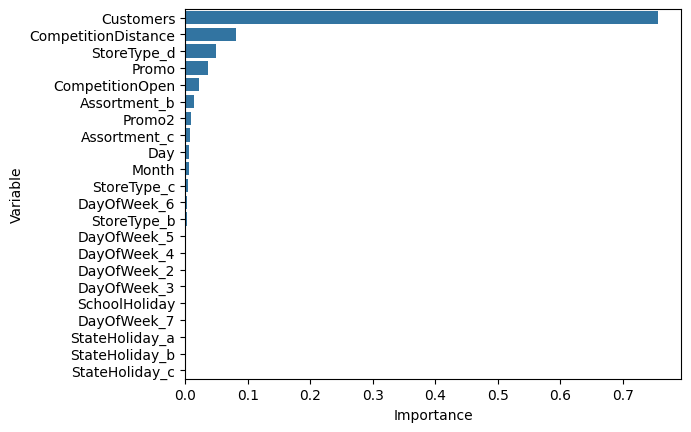

In [ ]:
#visualising feature importance of random forest
feature_imp = pd.DataFrame({"Variable": x_test.columns,"Importance": rf.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

Conclusion: The chart indicates that the number of customers is the most critical factor influencing business outcomes, followed by competition distance and store type. Promotions and competition age also significantly impact performance. Businesses should focus on attracting more customers, strategically considering competitor proximity, optimizing store formats, and leveraging promotions to drive success.

###Make Predictions

In [ ]:
y_pred_test = rf.predict(x_test)

# Plot the test results
a = y_test.copy()
a.reset_index(drop=False,inplace=True)

b = pd.DataFrame(y_pred_test.flatten())
a['Pred Sales'] = b

a.set_index(['Date','Store'],inplace=True)
df_plot = a.reset_index(level=['Date','Store'])

predictions = df_plot.groupby(['Date','Store'])[['Sales','Pred Sales']].sum()
predictions.head()

Sales  Pred Sales
Date       Store                      
2015-06-19 1     -0.971574   -0.957337
           2     -0.598267   -0.698847
           3      0.562095    0.472789
           4      0.989567    0.977329
           5     -0.251027   -0.403988

In [ ]:
#predictions_scaled = scaler.inverse_transform(np.column_stack([predictions, x_test]))[:, 0]
sales_pred_sales = predictions[['Sales', 'Pred Sales']].values
sales_pred_sales_scaled = scaler.inverse_transform(sales_pred_sales)

predictions_scaled = pd.DataFrame(sales_pred_sales_scaled, columns=['Sales', 'Pred Sales'], index=predictions.index)
print(predictions_scaled.head())

                         Sales   Pred Sales
Date       Store                           
2015-06-19 1       3940.375670  3984.564933
           2       5099.049653  4786.867670
           3       8700.596356  8423.407227
           4      10027.392159  9989.404813
           5       6176.819169  5702.056882


###Conclusion and Recommendations

Businesses utilize sales forecasts to estimate the revenue they will generate within a specific timeframe, enabling them to develop robust and strategic business plans. Critical decisions, such as budgeting, hiring, incentives, objectives, acquisitions, and various growth initiatives, are influenced by the projected revenue for the upcoming months. For these plans to be effective, it is crucial for the forecasts to be accurate.

This analysis forecasts the sales for XYZ over the recent six weeks and compares the model-generated results with the actual sales figures.

#####Conclusion

* Sales were highest on Sundays
* Promotions positively impacted customer turnout and sales.
* Most stores are located within 0 to 10 km of their competitors and had higher sales than stores located farther away, likely indicating the impact of competition in busy areas versus remote locations.
* Store type B, despite being fewer in number, had the highest average sales. This can be attributed to several factors, including offering all three kinds of assortments—especially assortment level B, which is exclusive to type B stores—and being open on Sundays.
* The outliers in the dataset exhibited justifiable behavior, often being either type B stores or those with ongoing promotions, which increased sales.
* The Random Forest Model provided the best results than the tuned model.

#####Recommendations

*  Leverage startegies to attract more customers
*  Additional stores should be motivated to participate in promotions.
*  The quantity of Store type B should be expanded.
*  Due to seasonal trends, stores should be incentivized to promote and capitalize on the holiday periods.